In [1]:
#import all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing data from given link and converting to readable
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print('imported succesfully')
data.head()

imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


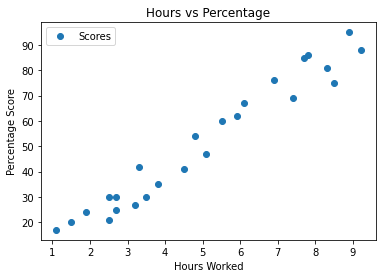

In [6]:
#now we need to visualize the given data 
data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Worked')
plt.ylabel('Percentage Scored')
plt.show()

In [7]:
#divide data into attributes and labels 
x = data.iloc[: , :-1].values
y = data.iloc[: , 1].values 

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [22]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training Complete")

Training Complete


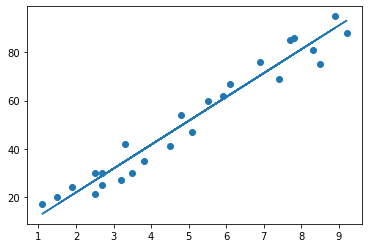

In [13]:
#visualizing the regression line
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [20]:
#model prediction
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
#comparison of scores
df = pd.DataFrame({'Actual': y_test , 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
#testing new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1 , 1)
own_pred = regressor.predict(test)
print('No. of hours = {}'.format(hours))
print('Predicted Score = {}'.format(own_pred[0]))

No. of hours = 9.25
Predicted Score = 93.69173248737539


In [25]:
#evaluating the algo
from sklearn import metrics
print ('mean absolute error:' , metrics.mean_absolute_error(y_test , y_pred))
print ('mean squared error:' , metrics.mean_squared_error(y_test , y_pred))

mean absolute error: 4.183859899002982
mean squared error: 21.598769307217456


In [26]:
regressor.score(x , y)

0.9526947647057273